# Data Analysis Capstone Project - Univelcity Bootcamp

### Name of student: Okonkwo Obinna Uzochukwu

## About this Dataset: 
This Dataset describes the transaction operations of a particular financial institution between the years 2019 -2020. This Dataset contains a selection of 6 variables about each transaction made by a specific account number, and there are 513247 records.

### Detailed description of the variables in the Dataset:

* **acct_no**: Identifies each account number.
* **txnYear**(Date): The year of a transaction.
* **txnMonth**(Date): The month of a transaction.
* **txnDay**(Date): The day of a transaction.
* **status**: The transaction's status, whether or not it was successful, failed, initialized, declined, pending or debited.
* **no of txns**: The number of transactions made by a particular account number on a specific day.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/mac/Downloads/Project 1A Data.xls")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513247 entries, 0 to 513246
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  513247 non-null  int64 
 1   acct_no     513247 non-null  object
 2   txnYear     513247 non-null  int64 
 3   txnMonth    513247 non-null  int64 
 4   txnDay      513247 non-null  int64 
 5   status      513247 non-null  object
 6   no of txns  513247 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 27.4+ MB


In [5]:
df.head()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,0,1001192k,2019,10,29,successful,1
1,1,1001192k,2019,11,12,failed,2
2,2,1001192k,2019,11,18,failed,1
3,3,1001192k,2019,11,27,successful,1
4,4,1001192k,2019,12,8,failed,1


## Data Wrangling:
After viewing the datatypes, Non-null count and some parts of the dataset, The "Unnamed: 0" feature will be dropped because it's not needed for the analysis, and the data type of the txnYear, txnMonth, txnDay columns will be changed to an object so I can convert it as a DateTime object. I will also combine the three columns(txnYear, txnMonth, txnDay) with being one date column as it will be easier for me to analyze.

txnYear, txnMonth, and txnDay has to be changed to object so I can work with the features as Date.

In [6]:
df['txnYear'] = df['txnYear'].astype('object')
df['txnMonth'] = df['txnMonth'].astype('object')
df['txnDay'] = df['txnDay'].astype('object')

In [7]:
df.dtypes

Unnamed: 0     int64
acct_no       object
txnYear       object
txnMonth      object
txnDay        object
status        object
no of txns     int64
dtype: object

I had to split the dataset between the transaction years. I observed that 2019 had only transactions for May - December, while 2020 had dealings from January - November. I didn't want to combine both years because records for months for each year were not available, so combining the data might lead to erroneous conclusions. Secondly, analysis for each year will unlock differences, similarities, and insights between transactions of the different years, which will guide the firm to determine KPIs and improve where necessary.

In [19]:
df_19 = df[df['txnYear'] == 2019] #Transactions for 2019
df_20 = df[df['txnYear'] == 2020] #Transactions for 2020

In [20]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151583 entries, 0 to 513179
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  151583 non-null  int64 
 1   acct_no     151583 non-null  object
 2   txnYear     151583 non-null  object
 3   txnMonth    151583 non-null  object
 4   txnDay      151583 non-null  object
 5   status      151583 non-null  object
 6   no of txns  151583 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.3+ MB


## Descriptive Summary for 2019 Data

In [21]:
df_19.describe(include = 'all')

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
count,151583.000000,151583,151583.0,151583.0,151583.0,151583,151583.000000
unique,NaN,3604,1.0,8.0,31.0,6,NaN
top,NaN,4203382q,2019.0,11.0,23.0,successful,NaN
freq,NaN,450,151583.0,24941.0,6112.0,131974,NaN
mean,256255.177170,NaN,NaN,NaN,NaN,NaN,1.990626
std,149065.603716,NaN,NaN,NaN,NaN,NaN,2.970844
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,125332.500000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,254075.000000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,389463.500000,NaN,NaN,NaN,NaN,NaN,2.000000


## Descriptive Summary for 2020 Data

In [22]:
df_20.describe(include = 'all')

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
count,361664.000000,361664,361664.0,361664.0,361664.0,361664,361664.000000
unique,NaN,7038,1.0,11.0,31.0,6,NaN
top,NaN,4203382q,2020.0,10.0,3.0,successful,NaN
freq,NaN,811,361664.0,80973.0,15068.0,341077,NaN
mean,256777.164329,NaN,NaN,NaN,NaN,NaN,2.587164
std,147781.269929,NaN,NaN,NaN,NaN,NaN,11.100839
min,7.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,129377.750000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,257313.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,383362.250000,NaN,NaN,NaN,NaN,NaN,3.000000


In [23]:
##Function to combine three columns as one to form a date format(YY-MM-DD)
def create_date(year, mon, day):
    return str(year) + "/" + str(mon) + "/" + str(day)

In [24]:
import warnings

warnings.filterwarnings('ignore')

### Combining 'txnYear', 'txnMonth', 'txnDay' columns to form a Date format column.

In [25]:
df_19['Date'] = df_19[['txnYear', 'txnMonth', 'txnDay']].apply(lambda x: create_date(x['txnYear'], x['txnMonth'], x['txnDay']), axis = 1)

df_19['Date']= pd.to_datetime(df_19['Date'])

df_19.drop(['txnYear', 'txnMonth', 'txnDay'], axis = 1, inplace = True)

In [26]:
df_20['Date'] = df_20[['txnYear', 'txnMonth', 'txnDay']].apply(lambda x: create_date(x['txnYear'], x['txnMonth'], x['txnDay']), axis = 1)

df_20['Date']= pd.to_datetime(df_20['Date'])

df_20.drop(['txnYear', 'txnMonth', 'txnDay'], axis = 1, inplace = True)

In [27]:
df_20.head()

,Unnamed: 0,acct_no,status,no of txns,Date
7,7,1001192k,successful,1,2020-02-06
8,8,1001192k,successful,1,2020-03-08
9,9,1001192k,successful,1,2020-03-10
10,10,1001192k,successful,1,2020-03-17
11,11,1001192k,successful,2,2020-03-25


In [28]:
df_19.head()

,Unnamed: 0,acct_no,status,no of txns,Date
0,0,1001192k,successful,1,2019-10-29
1,1,1001192k,failed,2,2019-11-12
2,2,1001192k,failed,1,2019-11-18
3,3,1001192k,successful,1,2019-11-27
4,4,1001192k,failed,1,2019-12-08


In [29]:
df_19.dtypes

Unnamed: 0             int64
acct_no               object
status                object
no of txns             int64
Date          datetime64[ns]
dtype: object

## Flow of the transactions per month for 2019

*The month of October had the highest number of transactions while May had the lowest number transactions. It will be worth investigating a sharp decline of transactions for the month of September and December*

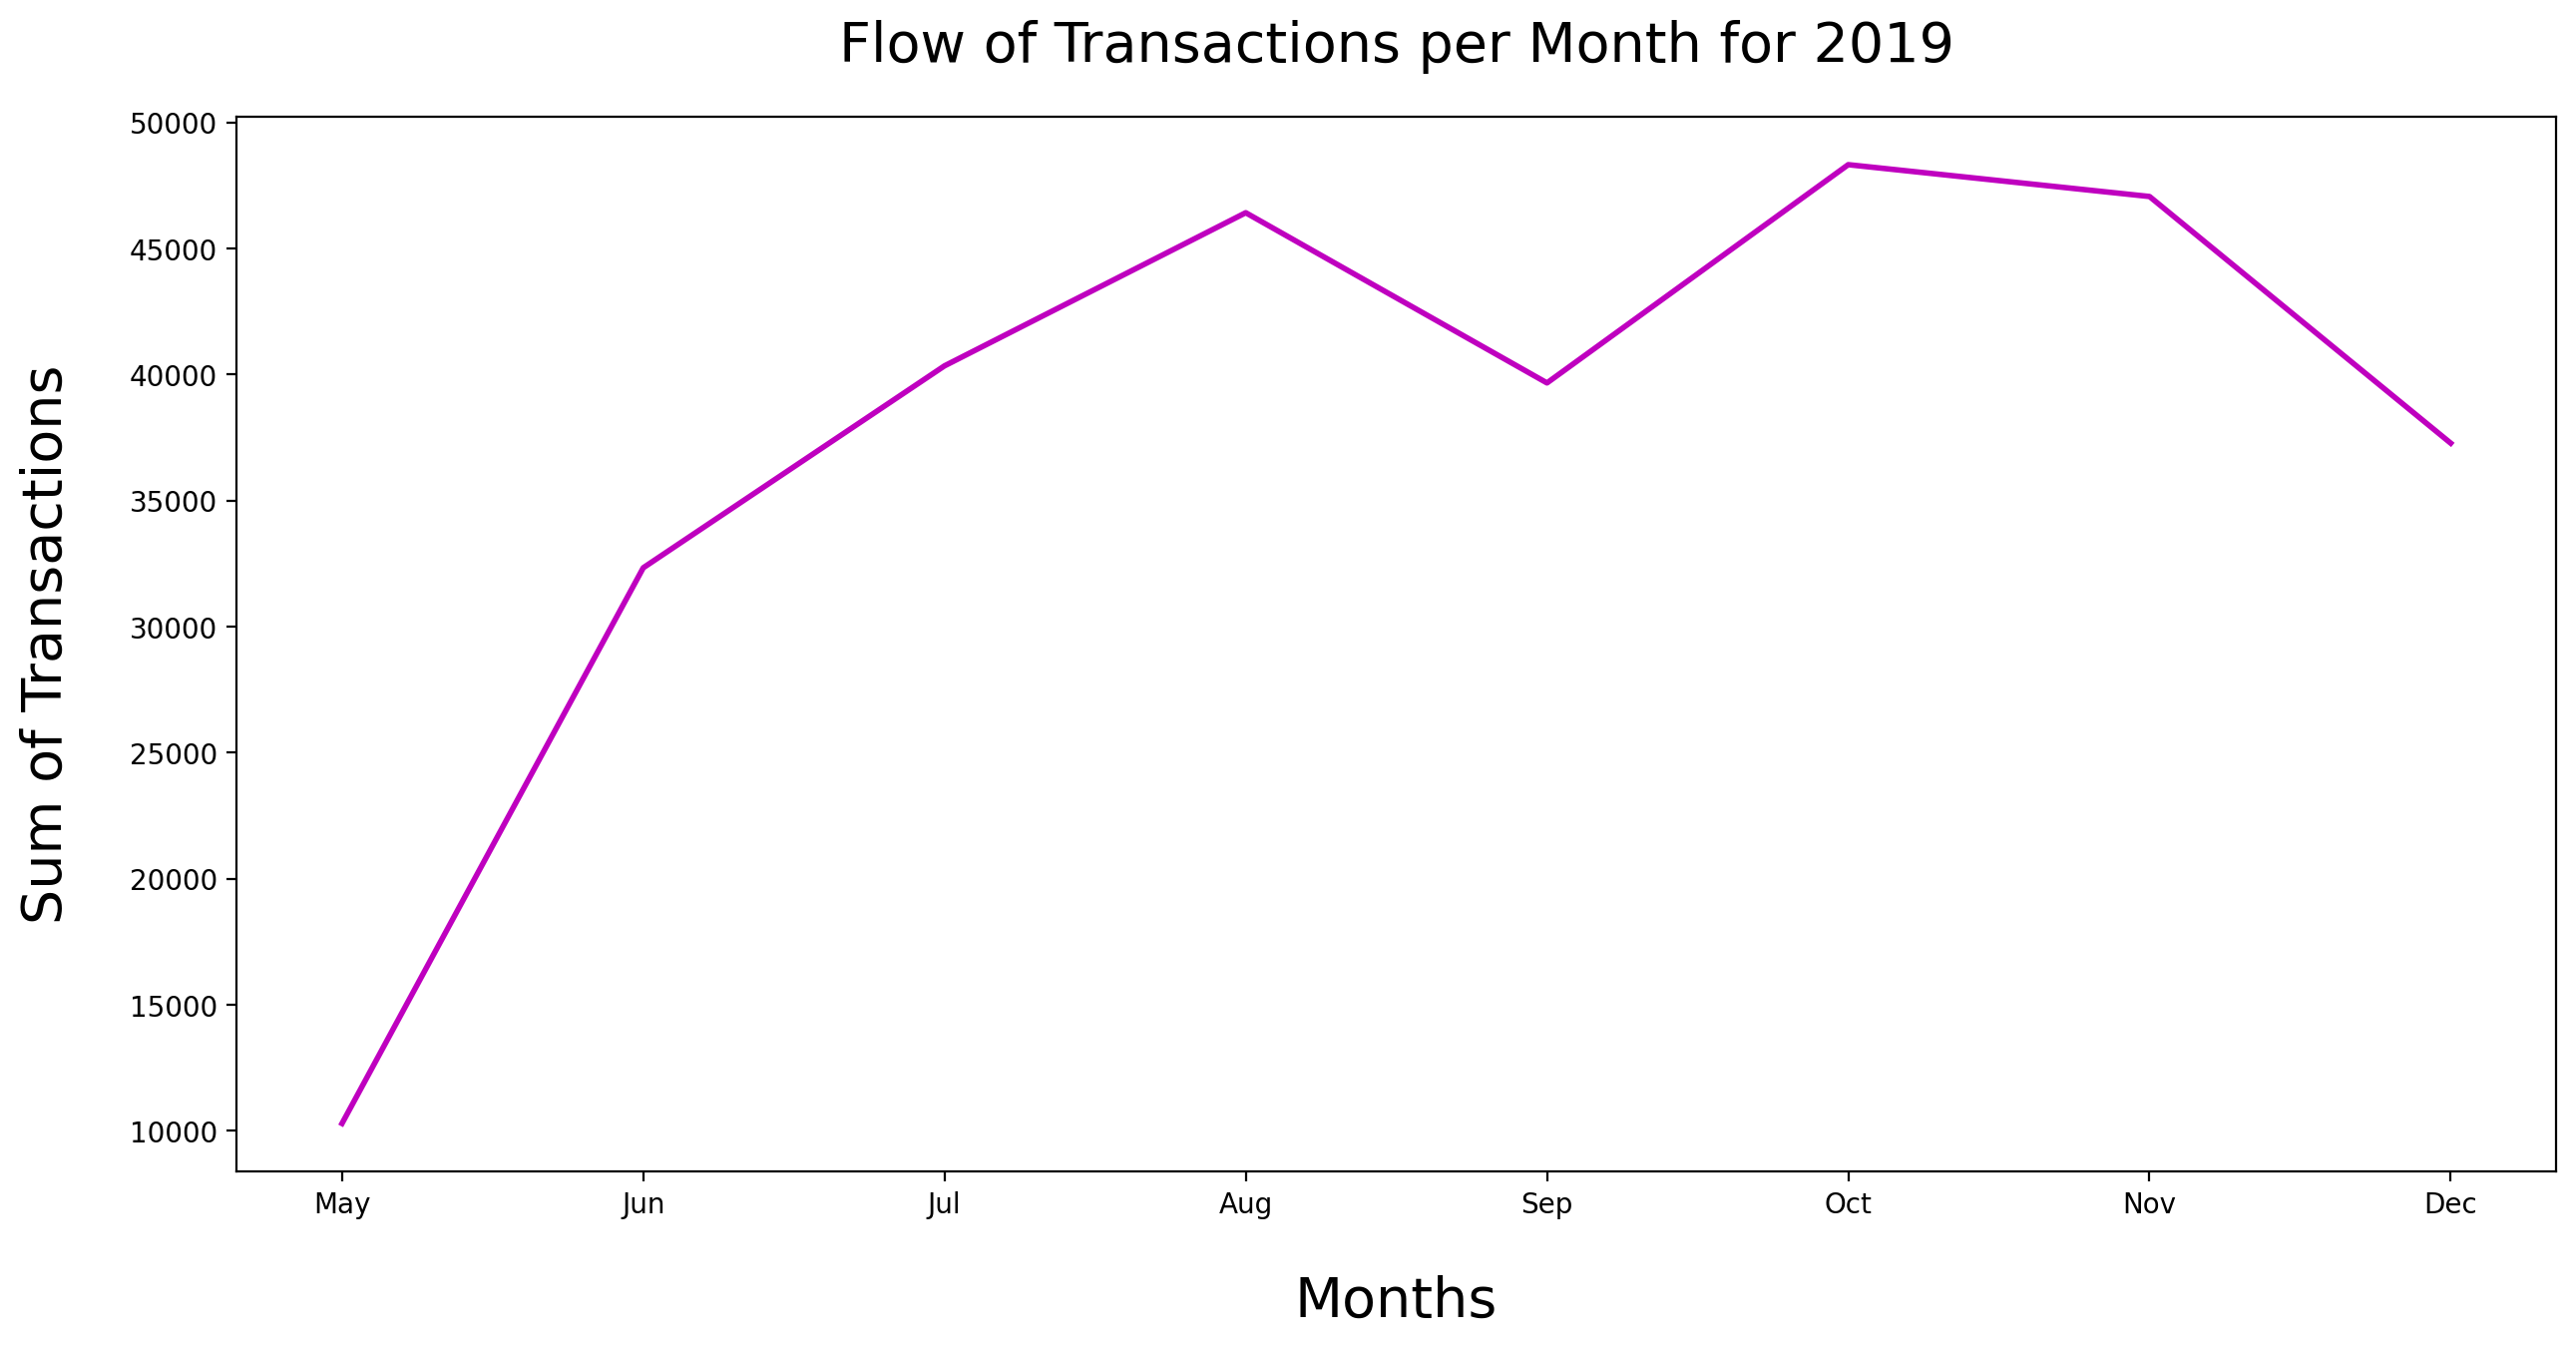

In [36]:
txns_month_19= df_19[['no of txns','Date']].groupby(df_19['Date'].dt.strftime('%b')).sum() 
txns_month_19.reset_index(inplace = True)
txns_month_19['Date'] = txns_month_19['Date'].apply(lambda x: dt.strptime(x, "%b"))
txns_month_19.sort_values(by = 'Date', inplace = True)
txns_month_19['Month'] = txns_month_19['Date'].apply(lambda x: x.strftime("%b"))
txns_month_19.drop('Date', axis = 1, inplace = True)


## Plot the flow of transactions
plt.figure(figsize = (15, 7), dpi = 200)
plt.plot(txns_month_19['Month'], txns_month_19['no of txns'], lw = 2,color = 'm')
plt.title("Flow of Transactions per Month for 2019", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.show()

In [22]:
txns_month_19.rename(columns={'no of txns': 'Sum of Txns-19'}, inplace = True)

## Flow of Transactions per month for 2020

*The month of October for 2020 also had the highest number transactions, but as seen in the flow below there was an abnormal increase in transactions in the month of September and October*

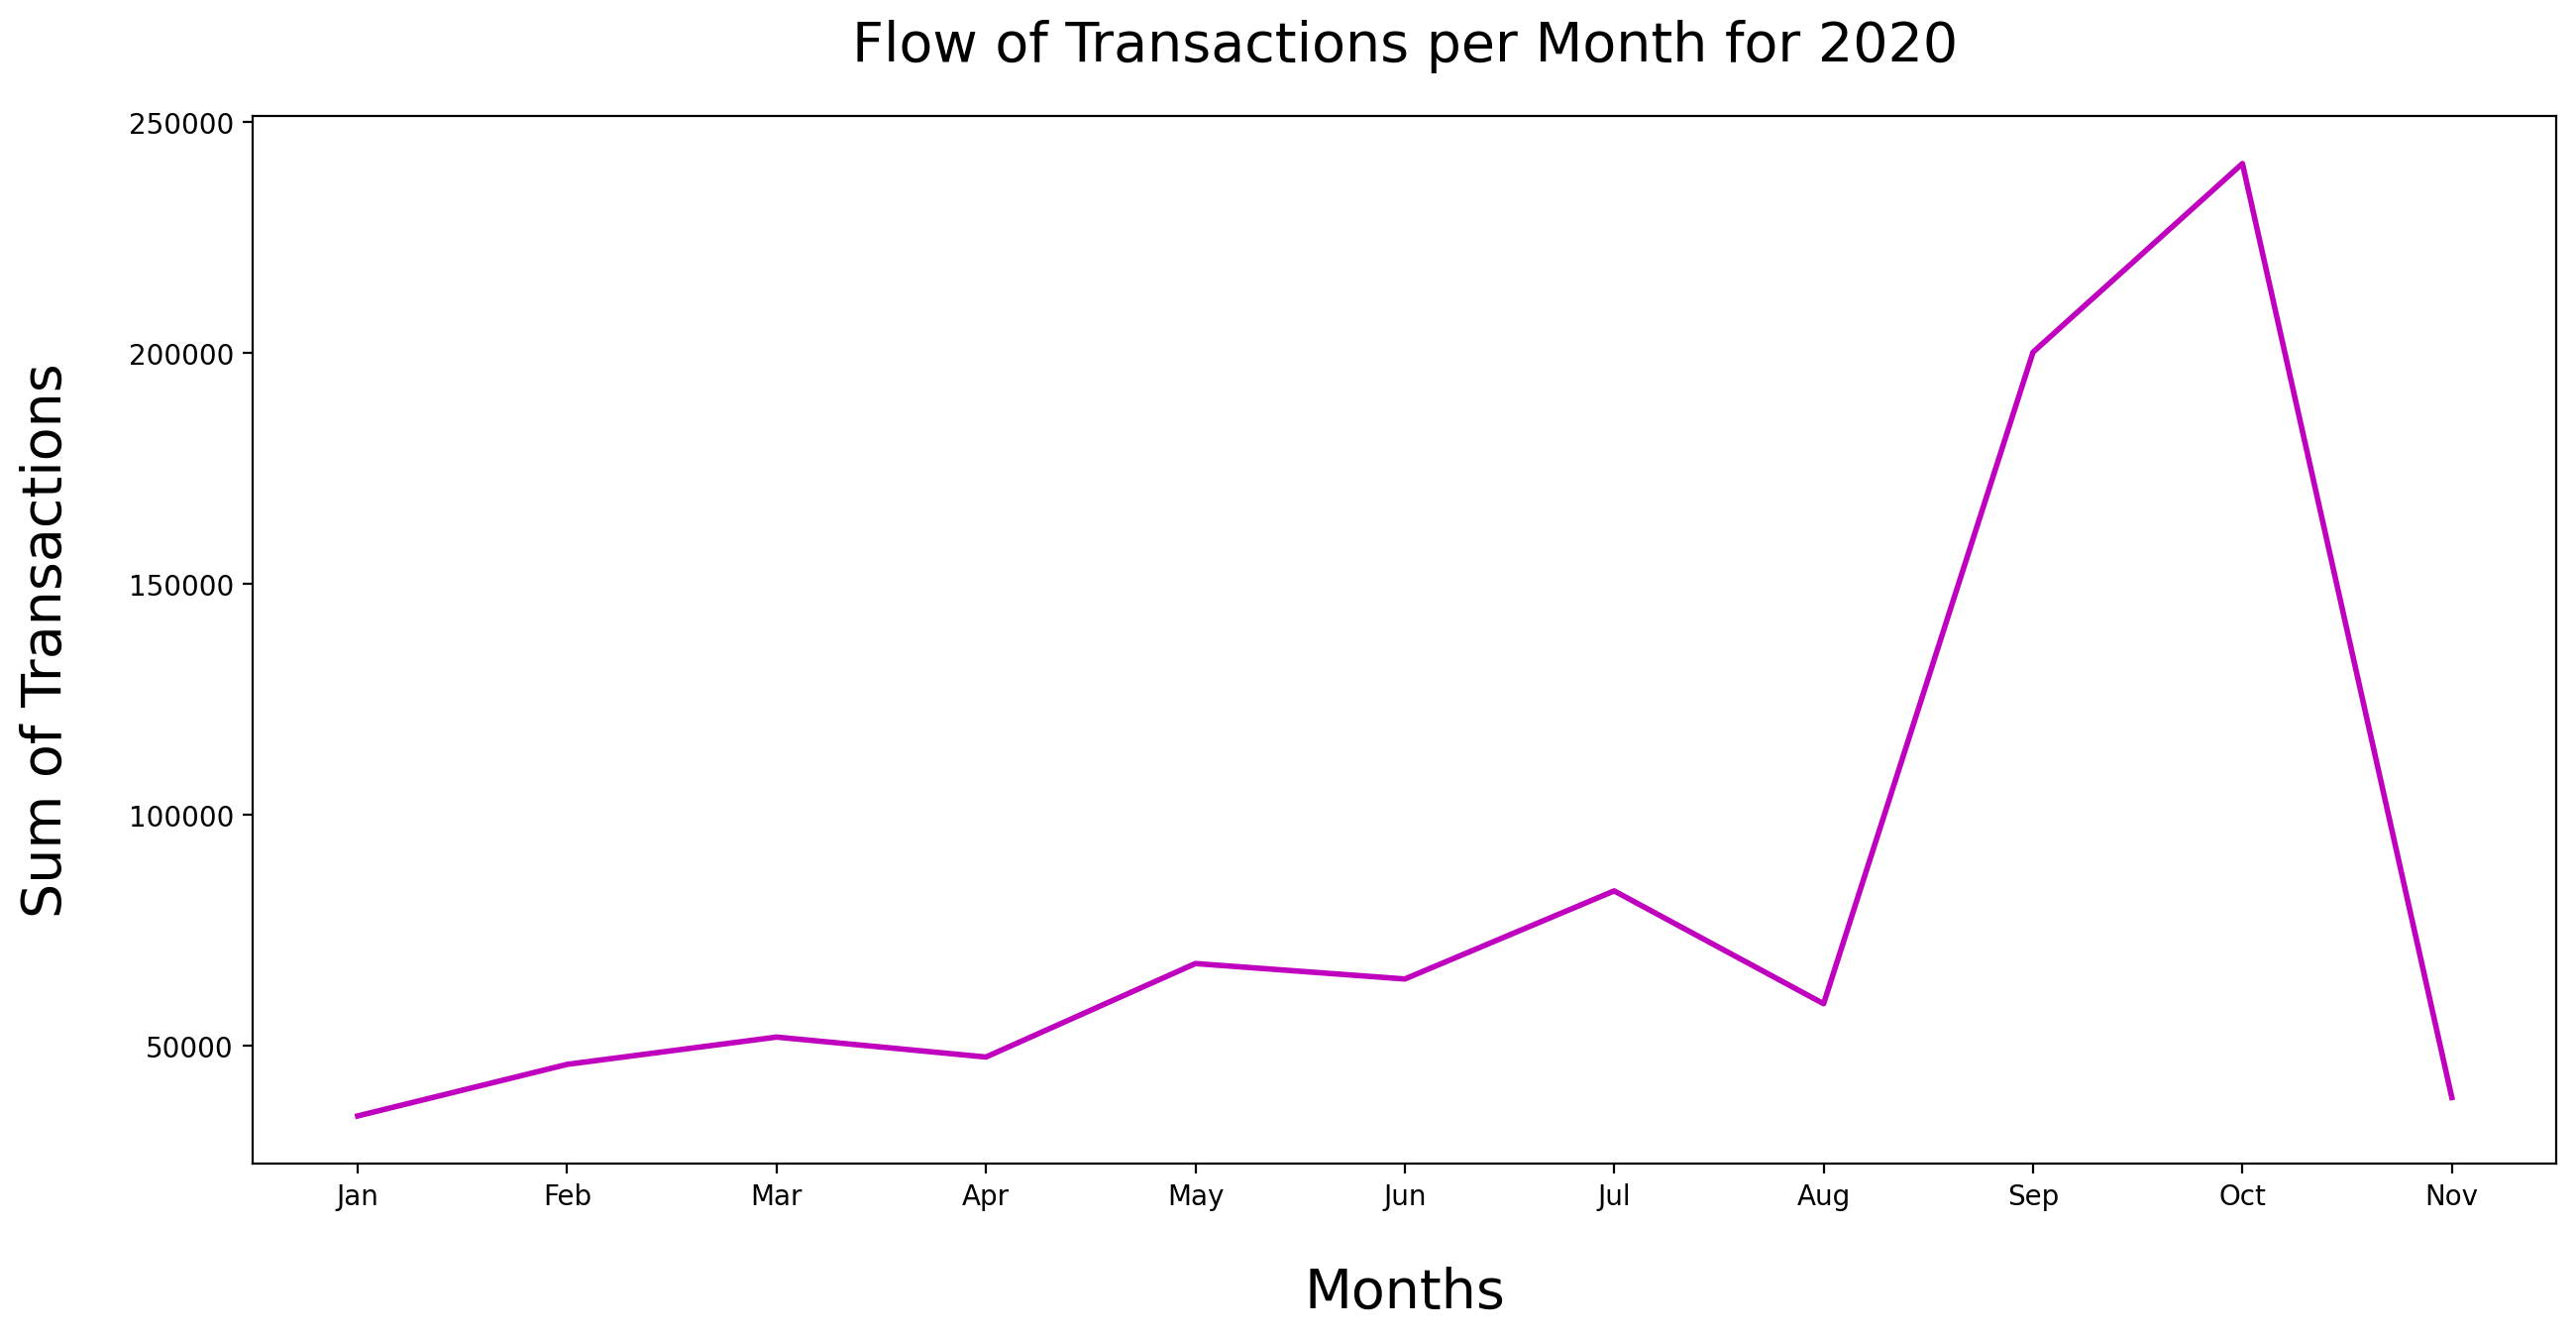

In [23]:
txns_month_20= df_20[['no of txns','Date']].groupby(df_20['Date'].dt.strftime('%b')).sum() 
txns_month_20.reset_index(inplace = True)
txns_month_20['Date'] = txns_month_20['Date'].apply(lambda x: dt.strptime(x, "%b"))
txns_month_20.sort_values(by = 'Date', inplace = True)
txns_month_20['Month'] = txns_month_20['Date'].apply(lambda x: x.strftime("%b"))
txns_month_20.drop('Date', axis = 1, inplace = True)


## Plot the flow of transactions
plt.figure(figsize = (15, 7), dpi =200)
plt.plot(txns_month_20['Month'], txns_month_20['no of txns'], lw = 2,color = 'm')
plt.title("Flow of Transactions per Month for 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.show()

# Comparing the flow of Transactions between 2019 and 2020

In [24]:
txns_month_20.rename(columns={'no of txns': 'Sum of Txns-20'}, inplace = True)

compare_yrs = pd.merge(txns_month_20, txns_month_19, on = 'Month', how = 'inner')

In [26]:
def cal_percent(new, old):
    percent_increase = ((new - old)/old)*100
    return percent_increase

compare_yrs['Percent Increase'] = compare_yrs[['Sum of Txns-20', 'Sum of Txns-19']].apply(lambda x : cal_percent(x['Sum of Txns-20'], x['Sum of Txns-19']), axis = 1)

In [27]:
compare_yrs

,Sum of Txns-20,Month,Sum of Txns-19,Percent Increase
0,67864,May,10297,559.065747
1,64521,Jun,32338,99.520688
2,83585,Jul,40347,107.165341
3,59166,Aug,46421,27.455247
4,200178,Sep,39670,404.608016
5,240997,Oct,48327,398.679827
6,38869,Nov,47065,-17.414214


**2020 evidently had an increase in transactions**

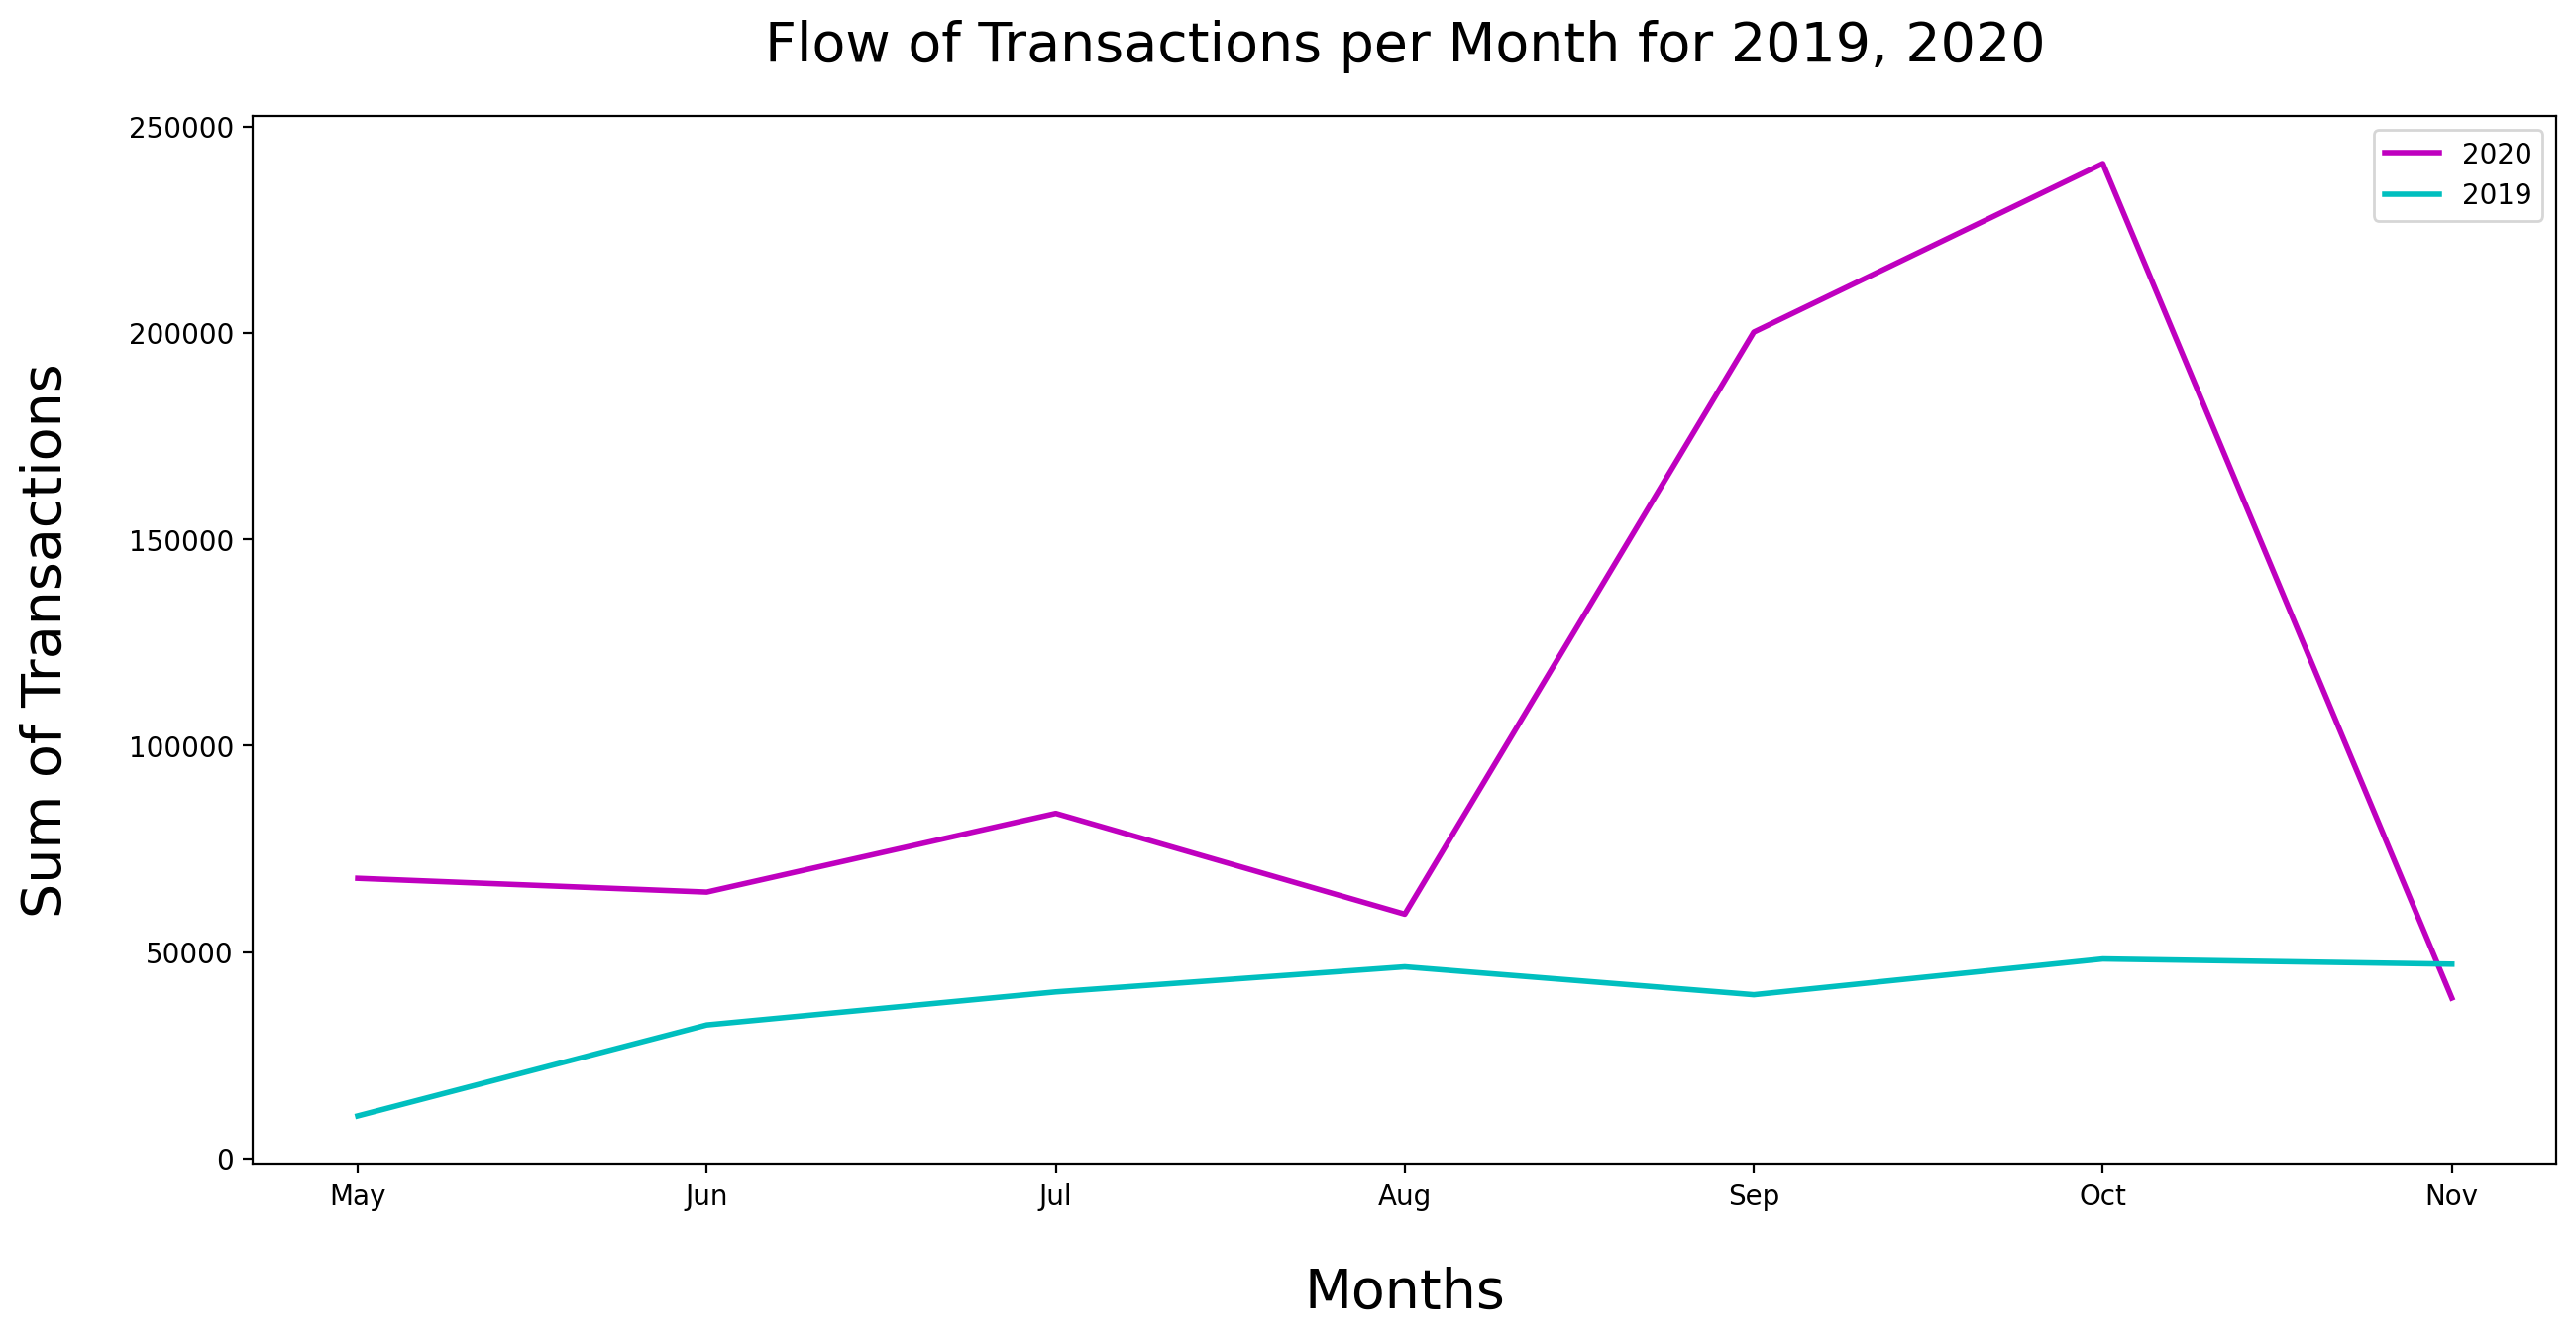

In [28]:
plt.figure(figsize = (15, 7), dpi = 200)

plt.plot(compare_yrs['Month'],compare_yrs['Sum of Txns-20'],  lw = 2,color = 'm', label = 2020)
plt.plot(compare_yrs['Month'],compare_yrs['Sum of Txns-19'],  lw = 2,color = 'c', label = 2019)
plt.title("Flow of Transactions per Month for 2019, 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.legend(loc = 'best')
plt.show()

# Investigating 'Successful' and 'Failed' Transaction Status 2019

In [29]:
status_count_19 = df_19['status'].value_counts().to_frame()
status_count_19['status_percentage'] = status_count_19['status'].apply(lambda x : (x/sum(status_count_19['status'].values)*100))
status_count_19.rename(columns = {'status': 'status_count'}, inplace = True)
status_count_19

,status_count,status_percentage
successful,131974,87.063853
failed,15621,10.305245
declined,3451,2.276641
initialized,465,0.306763
pending,42,0.027708
debited,30,0.019791


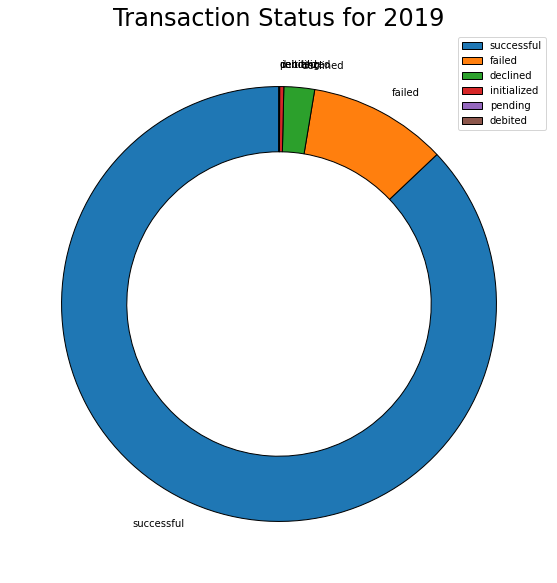

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.0}
ax.pie(status_count_19['status_percentage'], wedgeprops=wedgeprops, startangle=90, labels = status_count_19.index)
plt.legend(loc = 'best')
plt.title('Transaction Status for 2019', fontsize=24, loc='center')
plt.show()

In [31]:
status_df_19 = df_19.loc[df_19['status'].isin(['successful', 'failed'])]

In [32]:
dummy_df_19 = pd.get_dummies(status_df_19['status'])
dummy_df_19 = pd.concat([status_df_19, dummy_df_19], axis = 1)
new_dummy_df_19 = dummy_df_19[['Date', 'failed', 'successful']].groupby(dummy_df_19['Date'].dt.strftime('%b')).sum() 
new_dummy_df_19.reset_index(inplace = True)
new_dummy_df_19['Month'] = new_dummy_df_19['Date'].apply(lambda x: dt.strptime(x, '%b'))

new_dummy_df_19.sort_values(by = 'Month', inplace = True)
new_dummy_df_19['Month'] = pd.to_datetime(new_dummy_df_19['Month'])

new_dummy_df_19.drop('Date', inplace = True, axis = 1)
new_dummy_df_19['Month'] = new_dummy_df_19['Month'].apply(lambda x : x.strftime("%b"))

### Normalization
 - The failed and successful column is scaled down, so that so that both column values can be of the same range because the original values were so far apart.

In [34]:
# normalization
new_dummy_df_19['successful'] = new_dummy_df_19['successful']/ new_dummy_df_19['successful'].max()
new_dummy_df_19['failed'] = new_dummy_df_19['failed']/new_dummy_df_19['failed'].max()

In [54]:
new_dummy_df_19

,failed,successful,Month
4,0.151989,0.204586,May
3,0.711428,0.595837,Jun
2,0.247643,0.798493,Jul
0,0.281444,0.882588,Aug
7,0.188319,0.849593,Sep
6,0.382847,1.000000,Oct
5,1.000000,0.920224,Nov
1,0.628190,0.813382,Dec


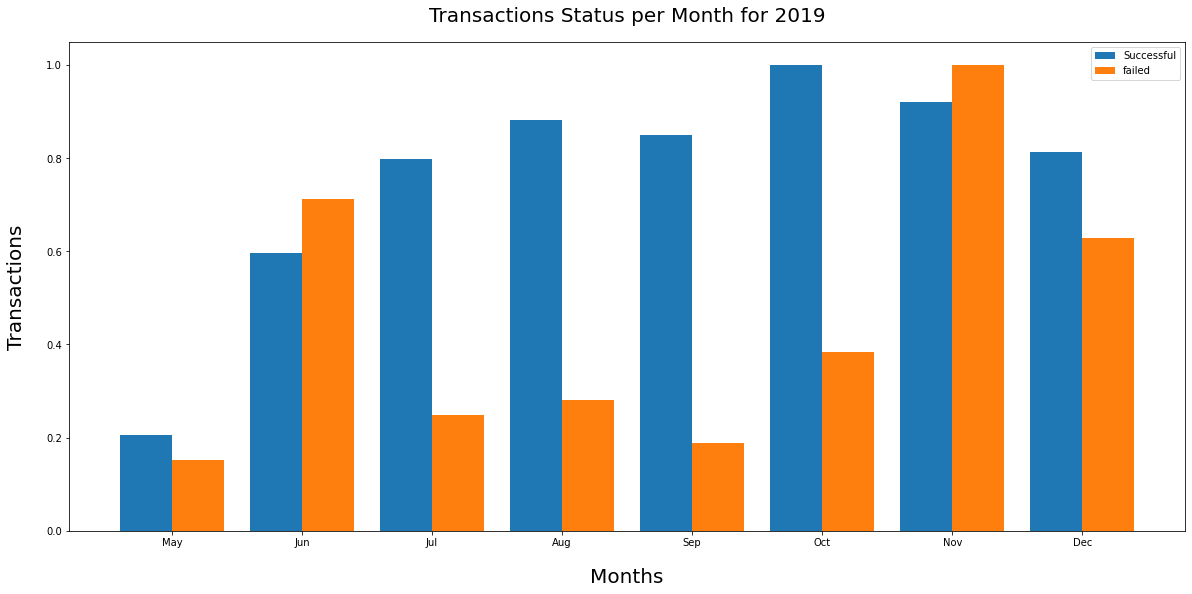

In [35]:
w = 0.4
bar1 = np.arange(len(new_dummy_df_19['Month']))
bar2 = [i + w for i in bar1]

plt.figure(figsize = (20, 9))
plt.bar(bar1, new_dummy_df_19['successful'], w, label = 'Successful')
plt.bar(bar2, new_dummy_df_19['failed'], w, label = 'failed')
plt.title("Transactions Status per Month for 2019", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Transactions" , labelpad = 20, size = 20)
plt.xticks(bar1 + w/2, new_dummy_df_19['Month'])
plt.legend(loc = 'best')
plt.show()

In [36]:
status_df_19['Week'] = status_df_19['Date'].dt.week

status_df_19_failed = status_df_19.loc[df['status'] == 'failed']

df_19_failed_txn = status_df_19_failed[['Week', 'no of txns']].groupby('Week').sum()

df_19_failed_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

df_19_failed_txn.reset_index(inplace = True)

df_19_failed_txn.rename(columns = {'no of txns': 'Sum of failed Transaction', 'Week': 'Week of the year'}, inplace = True)

## Sum of Failed Transaction per week in the Year 2019

In [38]:
df_19_failed_txn.

,Week of the year,Sum of failed Transaction
0,46,2746
1,23,1660
2,50,1445
3,26,1429
4,45,1340
5,48,1225
6,47,1209
7,49,1052
8,51,916
9,25,898


# Investigating 'Successful' and 'Failed' Transaction Status 2020

In [39]:
status_count_20 = df_20['status'].value_counts().to_frame()
status_count_20['status_percentage'] = status_count_20['status'].apply(lambda x : (x/sum(status_count_20['status'].values)*100))
status_count_20.rename(columns = {'status': 'status_count'}, inplace = True)
status_count_20

,status_count,status_percentage
successful,341077,94.307700
failed,13015,3.598644
declined,6792,1.877986
initialized,751,0.207651
pending,22,0.006083
debited,7,0.001935


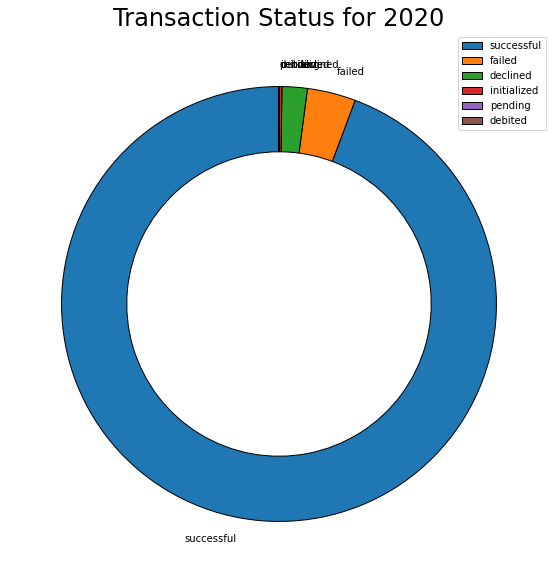

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.0}
ax.pie(status_count_20['status_percentage'], wedgeprops=wedgeprops, startangle=90, labels = status_count_20.index)
plt.legend(loc = 'best')
plt.title('Transaction Status for 2020', fontsize=24, loc='center')
plt.show()

In [41]:
status_df_20 = df_20.loc[df_20['status'].isin(['successful', 'failed'])]

In [42]:
dummy_df_20 = pd.get_dummies(status_df_20['status'])
dummy_df_20 = pd.concat([status_df_20, dummy_df_20], axis = 1)
new_dummy_df_20 = dummy_df_20[['Date', 'failed', 'successful']].groupby(dummy_df_20['Date'].dt.strftime('%b')).sum() 
new_dummy_df_20.reset_index(inplace = True)
new_dummy_df_20['Month'] = new_dummy_df_20['Date'].apply(lambda x: dt.strptime(x, '%b'))

new_dummy_df_20.sort_values(by = 'Month', inplace = True)
new_dummy_df_20['Month'] = pd.to_datetime(new_dummy_df_20['Month'])

new_dummy_df_20.drop('Date', inplace = True, axis = 1)
new_dummy_df_20['Month'] = new_dummy_df_20['Month'].apply(lambda x : x.strftime("%b"))

In [43]:
new_dummy_df_20

,failed,successful,Month
3,979.0,17396.0,Jan
2,709.0,17728.0,Feb
6,885.0,18917.0,Mar
0,624.0,16513.0,Apr
7,830.0,24898.0,May
5,947.0,28904.0,Jun
4,1158.0,37597.0,Jul
1,723.0,25466.0,Aug
10,3092.0,65020.0,Sep
9,2731.0,75606.0,Oct


In [44]:
# normalization
new_dummy_df_20['successful'] = new_dummy_df_20['successful']/ new_dummy_df_20['successful'].max()
new_dummy_df_20['failed'] = new_dummy_df_20['failed']/new_dummy_df_20['failed'].max()

### Normalization
 - The failed and successful column is scaled down, so that so that both column values can be of the same range because the original values were so far apart.

In [45]:
new_dummy_df_20

,failed,successful,Month
3,0.316624,0.230088,Jan
2,0.229301,0.234479,Feb
6,0.286223,0.250205,Mar
0,0.201811,0.218409,Apr
7,0.268435,0.329312,May
5,0.306274,0.382298,Jun
4,0.374515,0.497275,Jul
1,0.233829,0.336825,Aug
10,1.000000,0.859985,Sep
9,0.883247,1.000000,Oct


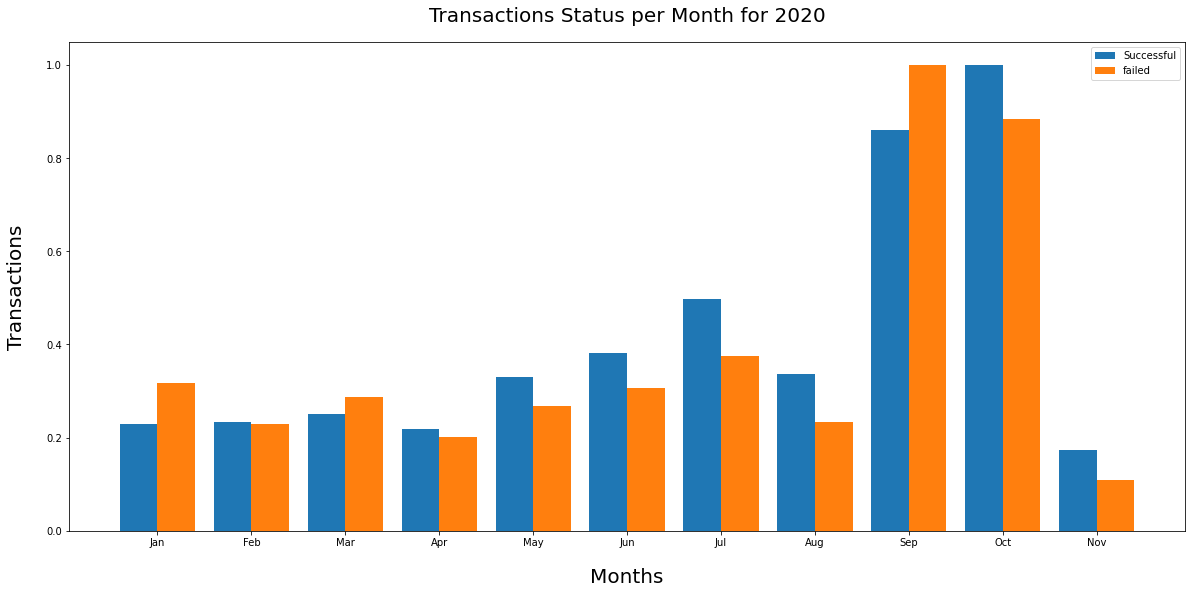

In [46]:
w = 0.4
bar3 = np.arange(len(new_dummy_df_20['Month']))
bar4 = [i + w for i in bar3]

plt.figure(figsize = (20, 9))
plt.bar(bar3, new_dummy_df_20['successful'], w, label = 'Successful')
plt.bar(bar4, new_dummy_df_20['failed'], w, label = 'failed')
plt.title("Transactions Status per Month for 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Transactions" , labelpad = 20, size = 20)
plt.xticks(bar3 + w/2, new_dummy_df_20['Month'])
plt.legend(loc = 'best')
plt.show()

In [47]:
status_df_20['Week'] = status_df_20['Date'].dt.week

status_df_20_failed = status_df_20.loc[df['status'] == 'failed']

df_20_failed_txn = status_df_20_failed[['Week', 'no of txns']].groupby('Week').sum()

df_20_failed_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

df_20_failed_txn.reset_index(inplace = True)

df_20_failed_txn.rename(columns = {'no of txns': 'Sum of failed Transaction', 'Week': 'Week of the year'}, inplace = True)

## Sum of Failed Transaction per week in the Year 2020

In [48]:
df_20_failed_txn

,Week of the year,Sum of failed Transaction
0,41,2491
1,38,2144
2,36,1569
3,40,1390
4,37,1064
5,42,867
6,39,748
7,20,533
8,29,495
9,15,495


## Accounts with the most transactions for 2019

In [91]:
df_19_acct_no_txn = df_19[['acct_no', 'no of txns']].groupby('acct_no').sum()

df_19_acct_no_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

top_10_acct_no_2019 = df_19_acct_no_txn.head(50)

In [84]:
top_10_acct_no_2019

,no of txns
acct_no,
4203382q,11971
8056313r,4550
5843310m,2934
3952626l,1595
3799729n,1564
7605895p,1516
8289982k,1493
4495282m,1251
7057639s,1217


## Accounts with the most transactions for 2020

In [90]:
df_20_acct_no_txn = df_20[['acct_no', 'no of txns']].groupby('acct_no').sum()

df_20_acct_no_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

top_10_acct_no_2020 = df_20_acct_no_txn.head(50)

In [86]:
top_10_acct_no_2020

,no of txns
acct_no,
4203382q,97184
5843310m,11023
8056313r,8614
9850157q,7243
2029125q,4597
7502779o,4454
4495282m,3438
8403415o,2704
3084534n,2157


# Accounts with the most Transcations for 2019 and 2020

In [97]:
acct_txns_19_20 = pd.merge(top_10_acct_no_2020, top_10_acct_no_2019, how = 'inner',on = 'acct_no' )

acct_txns_19_20.rename(columns = {"no of txns_x":"Transactions 2020", "no of txns_y":"Transactions 2019" }, inplace = True)

acct_txns_19_20

,Transactions 2020,Transactions 2019
acct_no,,
4203382q,97184,11971
5843310m,11023,2934
8056313r,8614,4550
2029125q,4597,1152
4495282m,3438,1251
3952626l,1716,1595
3850543q,1709,822
7868718r,1707,1143
7844050q,1669,1152
